In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [57]:
data= pd.read_csv('data.csv')

X=X = data.drop(['Unnamed: 0'], axis=1)
X.head()


,no_strokes_st,no_strokes_dy,speed_st,speed_dy,magnitude_vel_st,magnitude_horz_vel_st,magnitude_vert_vel_st,magnitude_vel_dy,magnitude_horz_vel_dy,magnitude_vert_vel_dy,...,magnitude_horz_jerk_dy,magnitude_vert_jerk_dy,ncv_st,ncv_dy,nca_st,nca_dy,in_air_stcp,on_surface_st,on_surface_dy,target
0,2.0,2.0,0.010988,0.009758,0.167357,0.116687,0.094172,0.201030,0.138797,0.114738,...,0.000006,0.000004,143.166667,308.000000,28.000000,65.000000,176.0,952.0,689.0,1.0
1,52.0,10.0,0.006874,0.006669,0.082170,0.053652,0.050760,0.071314,0.047286,0.043804,...,0.000004,0.000003,317.000000,345.200000,81.000000,83.333333,0.0,2107.0,2506.0,1.0
2,22.0,12.0,0.001636,0.001620,0.128316,0.083959,0.079109,0.068212,0.042802,0.043473,...,0.000003,0.000003,205.714286,262.285714,53.666667,83.000000,206.0,1369.0,2807.0,1.0
3,2.0,6.0,0.001793,0.001434,0.041127,0.026362,0.025751,0.059535,0.037716,0.038586,...,0.000002,0.000002,315.714286,299.666667,212.000000,285.000000,705.0,4025.0,2487.0,1.0
4,4.0,6.0,0.010127,0.009184,0.054456,0.035698,0.033174,0.076065,0.049734,0.048427,...,0.000002,0.000002,210.300000,319.500000,67.200000,262.000000,1221.0,2712.0,2337.0,1.0


In [58]:
y = X['target']
y.shape

(40,)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28, 30), (28,), (12, 30), (12,))

<AxesSubplot:>

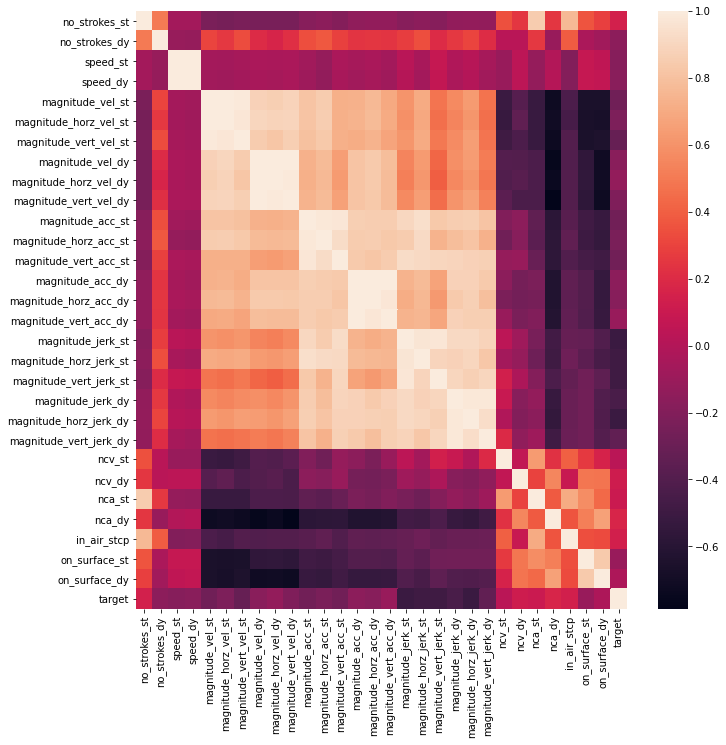

In [60]:
corr = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr)

In [61]:
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) > threshold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [62]:
correlated_features = correlation(data=X_train, threshold=.8)
len(set(correlated_features))

20

In [63]:
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

X_train.shape, X_test.shape

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((28, 10), (12, 10))

In [64]:
# Build a Dataframe with Correlation between Features
corr_matrix = X_train.corr()
# Take absolute values of correlated coefficients
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
# Take only features with correlation above threshold of 0.8
corr_matrix = corr_matrix[corr_matrix >= 0.2]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
corr_matrix.head()

,feature1,feature2,Correlation
0,no_strokes_st,in_air_stcp,0.765729
1,in_air_stcp,no_strokes_st,0.765729
2,nca_dy,magnitude_vel_st,0.717582
3,magnitude_vel_st,nca_dy,0.717582
4,magnitude_vel_st,on_surface_st,0.661024


In [65]:
grouped_features = []
correlated_groups = []

for feature in corr_matrix.feature1.unique():
    if feature not in grouped_features:
        # Find all features correlated to a single feature
        correlated_block = corr_matrix[corr_matrix.feature1 == feature]
        grouped_features = grouped_features + list(correlated_block.feature2.unique()) + [feature]
        
        # Append block of features to the list
        correlated_groups.append(correlated_block)

print('Found {} correlated feature groups'.format(len(correlated_groups)))
print('out of {} total features.'.format(X_train.shape[1]))

Found 2 correlated feature groups
out of 10 total features.


In [66]:
# Visualize Correlated Feature Groups
for group in correlated_groups:
    print(group)
    print('\n')

         feature1          feature2  Correlation
0   no_strokes_st       in_air_stcp     0.765729
13  no_strokes_st     no_strokes_dy     0.503774
27  no_strokes_st     on_surface_st     0.359661
28  no_strokes_st            ncv_st     0.345667
38  no_strokes_st            nca_dy     0.250412
40  no_strokes_st            ncv_dy     0.246452
42  no_strokes_st  magnitude_vel_st     0.234834


   feature1          feature2  Correlation
35   target  magnitude_vel_st     0.272273




In [67]:
# Investigating features further within one group
group = correlated_groups[1]
group

,feature1,feature2,Correlation
35,target,magnitude_vel_st,0.272273


In [68]:
# Select features with less missing data
for features in list(group.feature2.unique()) + ['ncv_dy']:
    print(X_train[feature].isnull().sum())

0
0


In [69]:
from sklearn.ensemble import RandomForestClassifier

features = list(group.feature2.unique()) + ['ncv_dy']
rfc = RandomForestClassifier(n_estimators=20, random_state=101, max_depth=4)
rfc.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, n_estimators=20, random_state=101)

In [70]:
# Get Feature Importance using RFC
importance = pd.concat([pd.Series(features), pd.Series(rfc.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

,feature,importance
0,magnitude_vel_st,0.587779
1,ncv_dy,0.412221
